### Sumário

- Introdução
- Jogando moedas
- Estimador de máxima verossimilhança (MLE)
- Probabilidade a priori
- Estimador máximo a posterior (MAP)
- Estimador de mínimo erro quadrático médio (MMSE)
- Probabilidade a posteriori
- Conclusão

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

### Introdução

Neste tópico vamos analisar como diferentes estimadores podem gerar diferentes estimativas a partir de um mesmo conjunto de dados, iremos analisar quais cuidados devemos ter nas premissas assumidas por cada estimador e por fim interpretaremos os resultados e tentaramos apresentar um breve guia de cuidados a tomar em cada caso.

Para que a discussão se torne o mais didática possível vamos ilustrar os diferentes estimadores aqui analisados através um exemplo simples, o jogar de uma moeda.

### Jogando moedas

Vamos supor inicialmente que a moeda será jogada N vezes e iremos observar a sequência de resultados, iremos supor que a probabilidade do lançamento resultar em cara não ira mudar de um lançamente para outro. 


Com base apenas nos dados vamos tentar estimar a probabilidade da moeda resultar em cara, a qual chamaremos de $\theta$.

Para começar vamos supor que obtivemos a seguinte sequência de resultados $\{H, H, H, H, T\}$, no qual $H$ é representado por 1 e $T$ representado 0.

In [2]:
toss_results = np.array([1, 1, 1, 1, 0])

Para comecar a discussão vamos responder a seguinte pergunta, para uma moeda justa com $\theta$ = 50%, qual probabilidade de obter 4 caras e 1 coroa em 5 lançamentos. Como esse processo segue uma distruição binomial, podemos calcular:

In [3]:
x = np.arange(0,6)
prob = [stats.binom.pmf(num, len(toss_results), 0.5) for num in x]

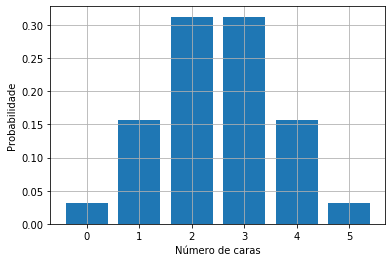

In [4]:
plt.bar(x, height=prob)
plt.ylabel('Probabilidade')
plt.xlabel('Número de caras')
plt.grid()

Podemos ver que a probabilidade de 4 caras acontecer não é tão baixa quando se porderia imaginar já que temos 15% de change de obter essa combinação mesmo com um moeda justa. Mais isso é o suficente para determinar que é moeda é justa? Que outras análises podemos fazer? A seguir vamos apresentar 3 diferentes estimadores para o valor de $\theta$.

### Estimador de máxima verossimilhança (MLE)

Vamos estimar a probabilidade de cara usando o critério de MLE (Maximum likelihood estimation), para isso vamos escrever a probabilidade de observar a sequência dado que a moeda tem probabilidade $\theta$.

$L(\overline{X}; \theta)$ = $p(\overline{X}/\theta)$ = $\prod_{i=0}^{n=5}\theta^{X_i}(1-\theta)^{(1-X_i)}$

Vamos encontrar $\theta$ que máximiza a função verossimilhança:

$\theta = \underset{\theta}{\operatorname{argmax}}L(\overline{X}; \theta) = \underset{\theta}{\operatorname{argmax}}log(L(\overline{X};\theta)) = \sum_{i=0}^{n=5}log(\theta^{X_i}(1-\theta)^{1-X_i}) = \sum_{i=1}^{n=5}X_ilog(\theta)+(1-X_i)log(1-\theta)$

Devirvando em relação a $\theta$ e igualando a 0 temos:

$\frac{1}{\theta}\sum_{i=1}^{n=5}X_i -\frac{1}{1-\theta}\sum_{i=0}^{n=5}(1-X_i)$ = 0

Apos rearrajar a expressão temos:

$\theta_{max} = \frac{1}{n}\sum_{i=0}^{n=5}X_i$

Ou seja, a probabilidade que máximiza o resultado observado é dada pela média do número de caras.

Vamos verficar isso graficamente.

In [5]:
head_prob_candidate = np.linspace(0, 1, 1500)

In [6]:
binpdf = stats.binom.pmf(np.sum(toss_results == 1), len(toss_results), head_prob_candidate)

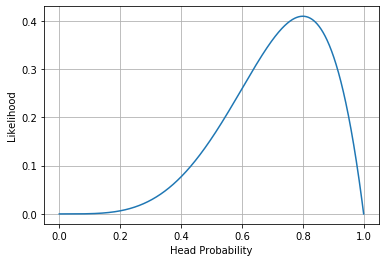

In [7]:
plt.plot(head_prob_candidate, binpdf)
plt.ylabel("Likelihood")
plt.xlabel("Head Probability")
plt.grid()

In [8]:
head_prob_candidate[np.argmax(binpdf)]

0.7998665777184789

E calculando a média temos:

In [9]:
np.mean(toss_results)

0.8

Notamos que o máximo da função de verossimilhança de fato coincide com o valor calculado.

Quando usamos o estimador MLE assumimos que os valores dos parâmetros a serem estimados são determinísticos, essa premissa nos impõe algumas restrições na hora de modelarmos problemas reais.

Para ilustrar essas limitações imaginemos que a moeda usada nos lançamentos foi dada por você de forma voluntária, após os 5 resultados não seria então razoável aceitar que a probabilidade de cara é de 80%, já que esperamos que uma moeda regular tenha igual probabilidade de cara e coroa.

Nesse caso temos um conhecimento prévio sobre a origem da moeda que não está incluido na estimativa via MLE, já que esta olha somente para os dados observados. Precisamos então inclui-lo no modelo do problema de alguma maneira.

Para nossa sorte, temos uma ferramenta para isso, a estatística Baysiana. Quando fazemos uma inferência baysiana não vemos mais a probabilidade de cara $\theta$ como um parâmetro, mas sim como uma variável aleatória que por sua vez terá a sua própria distribuição de probabilidade. Isso nos permite através da modelagem da pdf $\theta$ mostrar nossa crença inicial sobre o valor de $\theta$.

Por exemplo, se assumirmos que não temos conhecimento prévio sobre $\theta$ poderíamos modelar sua pdf como uniformemente distribuída entre 0 e 1. Já no cenário no qual nós fornecemos a moeda, temos grandes motivações para acreditar que a probabilidade de cara é um número próximo a 0.5 e poderíamos modelar a pdf de $\theta$ como uma pdf na qual $p(\theta = 0.5)$ é alto.

Vamos fazer isso modelando a pdf de $\theta$ por uma distribuição Beta. A distribuição Beta é uma pdf para variáveis aleatórias contínuas definidas no intervalo 0 e 1, como é o caso da probabilidade de se tirar cara. Além disso esta é definida basicamente por dois parâmetros $a$ e $b$. Mais detalhes sobre a distribuição Beta pode ser vistos em:

https://en.wikipedia.org/wiki/Beta_distribution

### Probabilidade a priori

Após ajustar os parâmetros $a$ e $b$ modelamos a pdf a proiri de $\theta$ como mostrada no gráfico:

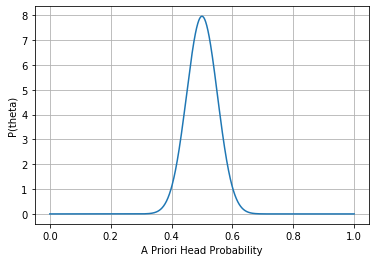

In [10]:
a = b = 50
dist = stats.beta(a, b).pdf(head_prob_candidate)

plt.plot(head_prob_candidate, dist)
plt.ylabel("P(theta)")
plt.xlabel("A Priori Head Probability")
plt.grid()

Podemos verificar que a gráfico de fato representa uma pdf já que sua área é igual a 1.

In [11]:
np.abs(np.trapz(head_prob_candidate, dist))

0.9999999999999956

Vemos que nossa informação a priori nos leva a acreditar que há uma grande chance da probabilidade de cara seja 0.5, mas pode variar um pouco devido a imperfeições em sua fabricação.


### Estimador máximo a posterior (MAP)

Com a pdf de $\theta$ em mãos, vamos agora calcular o estimador MAP (Maximum a posterior), esse estimador escolhe como valor de $\theta$ o valor que máximiza a probabilidade a posteriori. Cabe aqui, explicarmos o que o termo máximo a posteriori significa.

Lembremos que a pdf de $\theta$ é representação do nosso nosso conhecimento a priori, ou seja, o que sabemos sobre a moeda antes mesmo de qualquer lançamento ser realizado. Já a verossimilhança, nos mostra a probabilidade de observarmos os dados. Assim, a probabilidade a posteriori é definida como a probabilidade de $\theta$ após a incluirmos ao nosso conhecimento prévio o conhecimento obtido após observar os dados.

Matematicamente, podemos escrever isso através do teorema de Bayes:

$p(B/A) = \frac{p(A/B)p(B)}{p(A)}$

Mais particularmente ao nosso caso, temos:

$p(\theta/\overline{X}) = \frac{p(\overline{X}/\theta)p(\theta)}{p(\overline{X})}$

E $\theta_{map}$ será dado por:

$\theta = \underset{\theta}{\operatorname{argmax}}p(\theta/\overline{X}) = \underset{\theta}{\operatorname{argmax}}log(\frac{p(\overline{X}/\theta)p(\theta)}{p(\overline{X})}) = {\operatorname{argmax}}\frac{p(\overline{x}/\theta)p(\theta)}{p(\over)}= \operatorname{argmax}log(p(\overline{X}/\theta))+log(p(\theta))$ 

Podemos ignorar $p(\overline{X})$, já que esse termo não depende de $\theta$ e pode ser descartado.

Continuando o desenvolvimento:

 $\underset{\theta}{\operatorname{argmax}}log(p(\theta/\overline{X})) = \sum_{i=1}^{n=5}X_ilog(\theta)+(1-X_i)log(1-\theta) + log(Beta(\theta; a, b))$
 
Derivando temos:

$\frac{1}{\theta}\sum_{i=0}^{n=5}X_i - \frac{1}{1-\theta}\sum_{i=0}^{n=5}(1-X_i) + \frac{a-1}{\theta} -\frac{b-1}{1-\theta}$ => $\theta_{map} = \frac{n_R + a -1}{n+b+a-2}$, onde $n_R = \sum_{i=0}^{n=5}X_i$ e $n = 5$ 


O valor teórico de $\theta_{map} será:$

In [12]:
head_prob_map = (np.sum(toss_results)+a-1)/(len(toss_results)+a+b-2)
head_prob_map

0.5145631067961165

Vamos verificar esse resultado graficamente olhando o termo:

$f_{map}(\theta) = p(\overline{X}/\theta)p(\theta)$

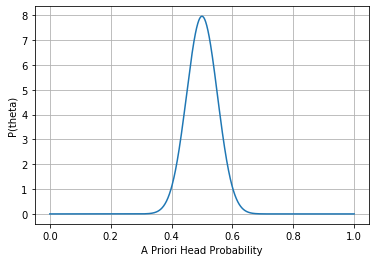

In [13]:
f_map = stats.beta(a, b).pdf(head_prob_candidate)*binpdf

plt.plot(head_prob_candidate, dist)
plt.ylabel("P(theta)")
plt.xlabel("A Priori Head Probability")
plt.grid()

In [14]:
head_prob_candidate[np.argmax(f_map)]

0.514342895263509

Vemos que a estimativa MAP é muito diferente da estimativa ML e que essa se aproxima do que esperávamos ao conhecer a origem da moeda. Nesse caso mesmo após quatro caras ainda acreditamos que a probabilidade é próxima a 0.5, um pouco maior que este valor talvez devida a alguma imperfeição.

É importante notar que para o cálculo de $\theta_{map}$ não foi necessário calcular de fato a probabilidade a posteriori pois para isso necessitaríamos calcular o termo $p(\overline{X})$ que aparece no denominador do teorema de Bayes. Este termo aparentemente simples, representa o maior desafio no calculo da pdf a posteriori. 

Por sorte (ou nem tanto) ao escolhermos nossa probabilidade a priori como sendo uma distribuição Beta, a probabilidade a posterior também será do tipo Beta, por isso, a distribuição Beta é chamada de conjugada para processos com pdf binomial. Mais informações sobre pdfs conjugadas podem ser vistas em:

https://en.wikipedia.org/wiki/Conjugate_prior

Olhando a tabela no link referenciado, a nova posteriori será dada por uma distribuição Beta com novos a e b iguais:

$a_{new} = a + \sum_{i=0}^{n=5}X_i$ e $b_{new} = b + N - \sum_{i=0}^{n=5}X_i$

Assim a probabilidade a posteriori é dada por:

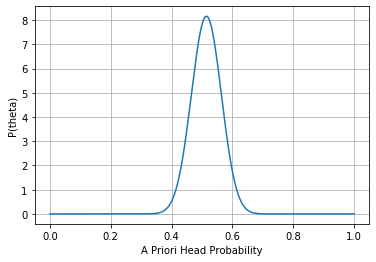

In [15]:
a_new = a + np.sum(toss_results)
b_new = b + len(toss_results) - np.sum(toss_results)

posterior = stats.beta(a_new, b_new).pdf(head_prob_candidate)

plt.plot(head_prob_candidate, posterior)
plt.ylabel("P(theta)")
plt.xlabel("A Priori Head Probability")
plt.grid()

Podemos verificar o seu máximo e ver que ele coincide com o valor encontrado ao maximizar somente os termos $p(\overline{X}/\theta)p(\theta)$.

In [16]:
head_prob_candidate[np.argmax(posterior)]

0.514342895263509

### Estimador de mínimo erro quadrático médio (MMSE)

Assim como nos casos anteriores, vamos calcular o estimador MMSE a partir de sua definição.

$\theta_{MMSE} = \underset{\theta}{\operatorname{argmin}}\int{(\theta-\hat{\theta})^2p(\theta/\overline{X})}d\theta$

Derivando em relação a $\hat{\theta}$ igualando a 0 temos:

$\theta_{MMSE} = \int{\theta}p(\theta/\overline{X})d\theta = E(\theta/\overline{X})$

Ou seja, o estimador MMSE é igual é média da probabilidade a posteriori. 

No nosso caso, a média de uma distribuição Beta com parâmetros $a$ e $b$ é:

$E(Beta(a, b)) = \frac{a}{a+b}$

Vamos então calcular o estimador MMSE pela equação e numericamente:


In [17]:
theta_mmse = a_new/(a_new+b_new)
theta_mmse

0.5142857142857142

In [18]:
np.mean(head_prob_candidate*posterior)

0.5139428571428575

Vemos que o cálculo do valor esperado da pdf a posterior foi igual ao através da equação da média da distruição Beta como esperado. E que apesar de próximo, o estimador MMSE é um pouco diferente do estimador MAP.

### Probabilidade a posteriori

Apesar do estimador MLE considerar que nosso parâmetro $\theta$ seja um parâmetro a ser determinado e os estimadores MAP e MMSE considerarem que $\theta$ é uma variável aleatória, ainda assim todos esses estimadores nos dão como resultado um único valor em relação a $\theta$, ou seja, toda a informação contida na probabilidade a posteriori é resumida em um único valor.

É importante lembrar que a pdf a posterior pode apresentar infomações mais valiosas do que somente um número. Por isso, pode ser preferível observar-lá antes de tomar qualquer decisão. Para o nosso exemplo o gráfico da pdf a posteriori é dado por:

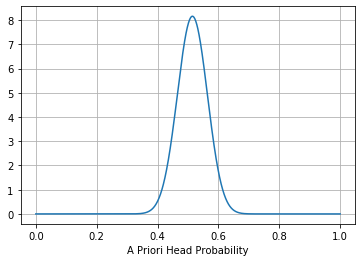

In [19]:
plt.plot(head_prob_candidate, posterior)
plt.xlabel("A Priori Head Probability")
plt.grid()

A partir da pdf a posterior, podemos se quisermos definir outros criterios, um exemplo seria um intervalo de 90% centrando no ponto mais provável da pdf.

In [21]:
center_index = np.argmax(dist)

step_index = 1
prob = 0

while prob < 0.90:
    min_index = center_index-step_index
    max_index = center_index+step_index
    prob = np.abs(np.trapz(head_prob_candidate[min_index:max_index],
                           dist[min_index:max_index]))
    step_index += 1
    
    
min_prob = head_prob_candidate[min_index]
max_prob = head_prob_candidate[max_index]

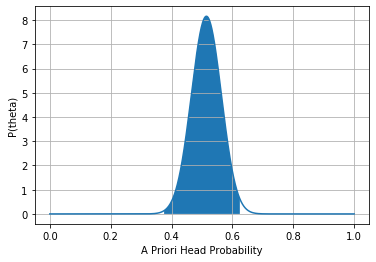

In [22]:
plt.plot(head_prob_candidate, posterior)
plt.fill_between(head_prob_candidate[min_index:max_index], posterior[min_index:max_index])
plt.ylabel("P(theta)")
plt.xlabel("A Priori Head Probability")
plt.grid()

In [23]:
(min_prob, max_prob)

(0.3755837224816544, 0.6250833889259506)

Ou seja, temos 90% de confiança de que o verdadeiro $\theta$ está entre 0.37 e 0.62.

### Conclusão

Neste tópico discutimos:
- Diferêntes maneiras de transformar dados em estimativas.
- Como modelar e estimar a probabilidade de obter cara num seqûencia de lancamentos de moedas.
- Como calulcar o estimador MLE e quais premissas estamos assumindo ao usarmos.
- Como podemos incluir nosso conhecimento prévio sobre a moeda lançada através de uma probabilidade a priori
- Como combinar à probabilidade a proiri com a informação obtida com os dados e assim atualizar nossa crença sobre o valor de $\theta$.
- Como calcular o estimador MMSE
- A importância e utilidade a probabilidade a posteriori
- Como podemos a partir da probabilidade a posterior resumi-la segundo os mais diferentes critérios, no caso um intervalo de confiança.